In [2]:
import pandas as pd


In [186]:
df = pd.read_csv("us_salary_summary.csv")


In [187]:
df
df = df.drop(columns='Count')


In [5]:
#salary parsing 
#title parsing
#education parsing 

In [10]:
salary = df['Compensation']

In [11]:
salary


0       > $500,000
1       > $500,000
2       > $500,000
3       > $500,000
4       > $500,000
           ...    
1172     $0 to 999
1173     $0 to 999
1174     $0 to 999
1175     $0 to 999
1176     $0 to 999
Name: Compensation, Length: 1177, dtype: object

In [16]:
new_salary = pd.DataFrame().assign(Salary = salary)

In [17]:
new_salary


,Salary
0,"> $500,000"
1,"> $500,000"
2,"> $500,000"
3,"> $500,000"
4,"> $500,000"
...,...
1172,$0 to 999
1173,$0 to 999
1174,$0 to 999
1175,$0 to 999


In [19]:
job_title = df['Title']

In [20]:
job_table = pd.DataFrame().assign(Job = job_title)

In [21]:
job_table

,Job
0,Data Scientist
1,Data Scientist
2,Data Scientist
3,Product/Project Manager
4,Business Analyst
...,...
1172,Software Engineer
1173,Other
1174,Other
1175,Other


In [33]:
df_1 = job_table.merge(new_salary, left_index = True,right_index = True)

In [34]:
df_1 

,Job,Salary
0,Data Scientist,"> $500,000"
1,Data Scientist,"> $500,000"
2,Data Scientist,"> $500,000"
3,Product/Project Manager,"> $500,000"
4,Business Analyst,"> $500,000"
...,...,...
1172,Software Engineer,$0 to 999
1173,Other,$0 to 999
1174,Other,$0 to 999
1175,Other,$0 to 999


In [36]:
df_1 = df_1.drop_duplicates(keep=False)

In [38]:
df_1 #data table to compare between salary and job title


,Job,Salary
18,Research Scientist,"> $500,000"
45,Business Analyst,"300,000 to 500,000"
46,Data Analyst,"300,000 to 500,000"
982,Data Engineer,"40,000 to 49,999"
1021,Research Scientist,"25,000 to 29,999"
1034,Statistician,"25,000 to 29,999"
1046,Data Scientist,"20,000 to 24,999"
1051,Research Scientist,"15,000 to 19,999"
1063,Product/Project Manager,"15,000 to 19,999"
1064,Data Engineer,"15,000 to 19,999"


In [54]:
temp1 = df_1[df_1.Salary.str.contains('to')]
temp2 = df_1[df_1.Salary.str.contains('>')]

In [58]:
temp1['min_salary'] = temp1['Salary'].apply(lambda x: x.split()[0])

/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/2989763313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['min_salary'] = temp1['Salary'].apply(lambda x: x.split()[0])


In [60]:
temp1['min_salary'] = temp1['min_salary'].apply(lambda x: x.replace(",",""))

/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/3748127461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['min_salary'] = temp1['min_salary'].apply(lambda x: x.replace(",",""))


In [62]:
temp1['min_salary'] = temp1['min_salary'].apply(lambda x: int(x))

/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/537543354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['min_salary'] = temp1['min_salary'].apply(lambda x: int(x))


In [65]:
temp1['max_salary'] = temp1['Salary'].apply(lambda x: x.split()[2])

/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/3566320115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['max_salary'] = temp1['Salary'].apply(lambda x: x.split()[2])


In [66]:
temp1['max_salary'] = temp1['max_salary'].apply(lambda x: x.replace(",",""))

/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/2489682385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['max_salary'] = temp1['max_salary'].apply(lambda x: x.replace(",",""))


In [67]:
temp1['max_salary'] = temp1['max_salary'].apply(lambda x: int(x))

/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/3613978787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['max_salary'] = temp1['max_salary'].apply(lambda x: int(x))


In [69]:
temp1['avg_salary'] = (temp1.min_salary + temp1.max_salary)/2

/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/2950458635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['avg_salary'] = (temp1.min_salary + temp1.max_salary)/2


In [76]:
temp2['Salary'] = temp2.Salary.apply(lambda y: y.replace("> $",""))

/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/1015847642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['Salary'] = temp2.Salary.apply(lambda y: y.replace("> $",""))


In [77]:
temp2

,Job,Salary
18,Research Scientist,"500,000"


In [78]:
temp2['min_salary'] = temp2.Salary.apply(lambda y: y.replace(",",""))

/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/1135915396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['min_salary'] = temp2.Salary.apply(lambda y: y.replace(",",""))


In [80]:
temp2['min_salary'] = temp2.min_salary.apply(lambda y: int(y))


/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/2653913161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['min_salary'] = temp2.min_salary.apply(lambda y: int(y))


In [83]:
temp2['max_salary'] = temp2['min_salary']
temp2["avg_salary"] = temp2['min_salary']

/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/3549694586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['max_salary'] = temp2['min_salary']
/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/3549694586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2["avg_salary"] = temp2['min_salary']


In [84]:
temp2

,Job,Salary,min_salary,max_salary,avg_salary
18,Research Scientist,"500,000",500000,500000,500000


In [85]:
temp = temp1.append(temp2, ignore_index = True)

In [94]:
job_table = temp.groupby('Job').mean()

In [95]:
job_table = job_table.drop(columns= ['min_salary','max_salary'])

In [96]:
job_table = job_table.sort_values(by= 'avg_salary')

In [98]:
job_table 
#created a job_table with the average salary of all the different positions
#data may be distorted because the different variables such as the company_size, gender, etc may not have been evenly
#distributed for all the different jobs

,avg_salary
Job,
Software Engineer,1499.500000
Product/Project Manager,11166.166667
Data Scientist,11249.500000
Statistician,14499.500000
Data Engineer,17124.500000
Research Scientist,81606.714286
Business Analyst,134999.666667
Data Analyst,204374.750000


In [104]:
#create a table to compare the salary with company size
company_table = pd.DataFrame().assign(company_size = df['Company_Size'], salary = df['Compensation'])

In [105]:
company_table = company_table.drop_duplicates(keep=False)

In [106]:
#start cleaning up the data 
temp1 = company_table[company_table.salary.str.contains('to')]
temp2 = company_table[company_table.salary.str.contains('>')]

In [112]:
#clean up the salary with range
temp1['min_salary'] = temp1['salary'].apply(lambda x: x.split()[0])
temp1['min_salary'] = temp1['min_salary'].apply(lambda x: x.replace(",",""))
temp1['min_salary'] = temp1['min_salary'].apply(lambda x: int(x))
temp1['max_salary'] = temp1['salary'].apply(lambda x: x.split()[2])
temp1['max_salary'] = temp1['max_salary'].apply(lambda x: x.replace(",",""))
temp1['max_salary'] = temp1['max_salary'].apply(lambda x: int(x))
temp1['avg_salary'] = (temp1.min_salary + temp1.max_salary)/2

/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/2002384643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['min_salary'] = temp1['salary'].apply(lambda x: x.split()[0])
/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/2002384643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['min_salary'] = temp1['min_salary'].apply(lambda x: x.replace(",",""))
/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/2002384643.py:4: SettingWithCopyWarning: 
A va

In [113]:
temp2['salary'] = temp2.salary.apply(lambda y: y.replace("> $",""))
temp2['min_salary'] = temp2.salary.apply(lambda y: y.replace(",",""))
temp2['min_salary'] = temp2.min_salary.apply(lambda y: int(y))
temp2['max_salary'] = temp2['min_salary']
temp2["avg_salary"] = temp2['min_salary']

/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/1777180455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['salary'] = temp2.salary.apply(lambda y: y.replace("> $",""))
/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/1777180455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['min_salary'] = temp2.salary.apply(lambda y: y.replace(",",""))
/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/1777180455.py:3: SettingWithCopyWarning: 
A value is 

In [115]:
temp = temp1.append(temp2,ignore_index = True)

In [117]:
company_table = temp.groupby('company_size').mean().drop(columns=['min_salary','max_salary'])

In [119]:
company_table = company_table.sort_values(by='avg_salary')

In [122]:
company_table
#contains the average salary for different company sizes
#data is flawed for similar reasons as 'job_table'

,avg_salary
company_size,
"> 10,000 employees",2499.500000
"1000-9,999 employees",5249.500000
250-999 employees,15416.166667
50-249 employees,78856.714286


In [132]:
#create table to see to compare gender with salary
gender_table = pd.DataFrame().assign(gender = df['Gender'], salary = df['Compensation'])

In [139]:
#start cleaning up the data 
temp1 = gender_table[gender_table.salary.str.contains('to')]
temp2 = gender_table[gender_table.salary.str.contains('>')]

#clean up the salary with range
temp1['min_salary'] = temp1['salary'].apply(lambda x: x.split()[0])
temp1['min_salary'] = temp1['min_salary'].apply(lambda x: x.replace(",",""))
temp1['min_salary'] = temp1['min_salary'].apply(lambda x: x.replace("$","") if "$" in x else x)
temp1['min_salary'] = temp1['min_salary'].apply(lambda x: int(x))
temp1['max_salary'] = temp1['salary'].apply(lambda x: x.split()[2])
temp1['max_salary'] = temp1['max_salary'].apply(lambda x: x.replace(",",""))
temp1['max_salary'] = temp1['max_salary'].apply(lambda x: int(x))
temp1['avg_salary'] = (temp1.min_salary + temp1.max_salary)/2

temp2['salary'] = temp2.salary.apply(lambda y: y.replace("> $",""))
temp2['min_salary'] = temp2.salary.apply(lambda y: y.replace(",",""))
temp2['min_salary'] = temp2.min_salary.apply(lambda y: int(y))
temp2['max_salary'] = temp2['min_salary']
temp2["avg_salary"] = temp2['min_salary']

/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/1620836318.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['min_salary'] = temp1['salary'].apply(lambda x: x.split()[0])
/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/1620836318.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['min_salary'] = temp1['min_salary'].apply(lambda x: x.replace(",",""))
/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/1620836318.py:8: SettingWithCopyWarning: 
A va

In [142]:
temp = temp1.append(temp2,ignore_index = True)

In [144]:
gender_table = temp.groupby('gender').mean()

In [150]:
gender_table = gender_table.sort_values(by='avg_salary')

In [151]:
gender_table

,avg_salary
gender,
Female,95032.077465
Not Mentioned,110925.985294
Male,128292.373826
Self Describe,161249.571429


In [152]:
gender_table.describe()

,avg_salary
count,4.000000
mean,123875.002003
std,28378.177903
min,95032.077465
25%,106952.508337
50%,119609.179560
75%,136531.673227
max,161249.571429


In [174]:
#Tables that will be used for a bit of exploratory data analysis
print(job_table)
print(company_table)
print(gender_table)

                            avg_salary
Job                                   
Software Engineer          1499.500000
Product/Project Manager   11166.166667
Data Scientist            11249.500000
Statistician              14499.500000
Data Engineer             17124.500000
Research Scientist        81606.714286
Business Analyst         134999.666667
Data Analyst             204374.750000
                        avg_salary
company_size                      
> 10,000 employees     2499.500000
1000-9,999 employees   5249.500000
250-999 employees     15416.166667
50-249 employees      78856.714286
                  avg_salary
gender                      
Female          95032.077465
Not Mentioned  110925.985294
Male           128292.373826
Self Describe  161249.571429


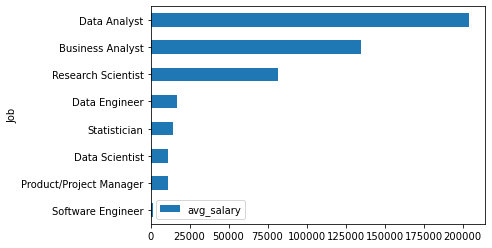

In [167]:
# Bar chart that shows the average salary for different job positions
job_table.plot(kind='barh',y='avg_salary');

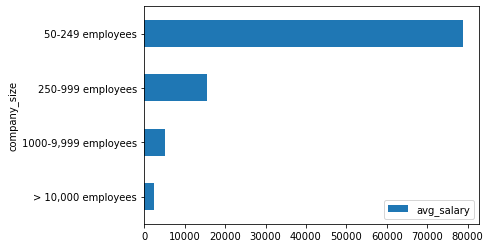

In [170]:
#Bar chart to show the average salary for different company sizes 
company_table.plot(kind='barh',y='avg_salary');

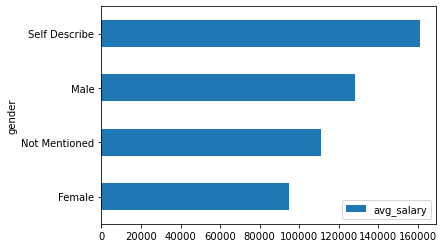

In [172]:
#Bar chart to see the pattern of salary earned with gender
gender_table.plot(kind='barh',y='avg_salary');

In [189]:
df.rename(columns = {'Compensation':'salary'}, inplace = True)
temp1 = df[df.salary.str.contains('to')]
temp2 = df[df.salary.str.contains('>')]

#clean up the salary with range
temp1['min_salary'] = temp1['salary'].apply(lambda x: x.split()[0])
temp1['min_salary'] = temp1['min_salary'].apply(lambda x: x.replace(",",""))
temp1['min_salary'] = temp1['min_salary'].apply(lambda x: x.replace("$","") if "$" in x else x)
temp1['min_salary'] = temp1['min_salary'].apply(lambda x: int(x))
temp1['max_salary'] = temp1['salary'].apply(lambda x: x.split()[2])
temp1['max_salary'] = temp1['max_salary'].apply(lambda x: x.replace(",",""))
temp1['max_salary'] = temp1['max_salary'].apply(lambda x: int(x))
temp1['avg_salary'] = (temp1.min_salary + temp1.max_salary)/2

temp2['salary'] = temp2.salary.apply(lambda y: y.replace("> $",""))
temp2['min_salary'] = temp2.salary.apply(lambda y: y.replace(",",""))
temp2['min_salary'] = temp2.min_salary.apply(lambda y: int(y))
temp2['max_salary'] = temp2['min_salary']
temp2["avg_salary"] = temp2['min_salary']

/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/3091740821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['min_salary'] = temp1['salary'].apply(lambda x: x.split()[0])
/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/3091740821.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['min_salary'] = temp1['min_salary'].apply(lambda x: x.replace(",",""))
/var/folders/r3/mc3pdgtj3rn3d0pd71phd8540000gr/T/ipykernel_69458/3091740821.py:8: SettingWithCopyWarning: 
A va

In [193]:
temp1 = temp1.drop(columns = 'salary')
temp2 = temp2.drop(columns = 'salary')

In [194]:
new_df = temp2.append(temp1,ignore_index=True)

In [195]:
new_df

,Education,Title,Company_Size,Gender,min_salary,max_salary,avg_salary
0,Doctoral degree,Data Scientist,"> 10,000 employees",Male,500000,500000,500000.0
1,Doctoral degree,Data Scientist,"1000-9,999 employees",Male,500000,500000,500000.0
2,Doctoral degree,Data Scientist,0-49 employees,Male,500000,500000,500000.0
3,Doctoral degree,Product/Project Manager,"> 10,000 employees",Male,500000,500000,500000.0
4,Doctoral degree,Business Analyst,"1000-9,999 employees",Male,500000,500000,500000.0
...,...,...,...,...,...,...,...
1172,Some college/university,Software Engineer,0-49 employees,Male,0,999,499.5
1173,Some college/university,Other,50-249 employees,Male,0,999,499.5
1174,Some college/university,Other,0-49 employees,Male,0,999,499.5
1175,I prefer not to answer,Other,0-49 employees,Male,0,999,499.5


In [196]:
new_df.to_csv('cleaned_data.csv', index=False)
